In [1]:
import sys
import copy
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom, Atom_File_handler_new
from classes.optimizers.random_struct_search import Random_Searcher
from classes.optimizers.md_simulator import MD_simulator_new
import matplotlib.pyplot as plt
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
file_handler = Atom_File_handler_new()
poses = [np.array([-.5,0.0]), np.array([0.5,0.0]), np.array([0.0,0.5])]
atom_list = [Atom(position=pos) for pos in poses]
atom_col = Atom_Collection(atomlist=atom_list)
atom_col.calculator = LennardJones()
min_searcher = Random_Searcher(atom_col=atom_col, step_size=0.1)
relaxed_atoms = min_searcher.line_search(atom_col=atom_col, fmax=0.05)[0]

In [3]:
md_simulator = MD_simulator_new(atom_col=relaxed_atoms)
temp_step = 0.05
temps = np.arange(0, 2.0+temp_step, temp_step)
#for i, temp in enumerate(temps[37:38]):
atom_cols = md_simulator.run_MD_simulation(temp=2.0, N_steps=1000, time_step=0.01)
    #file_handler.save_atom_collections(atom_cols=atom_cols, filename=f"exercise27_mds/sim_{i}")

In [4]:
from scipy.signal import savgol_filter

In [5]:
kin_e = np.array([atom_col.get_kinetic_energy() for atom_col in atom_cols])
pot_e = np.array([atom_col.get_potential_energy() for atom_col in atom_cols])
tot_e = kin_e + pot_e

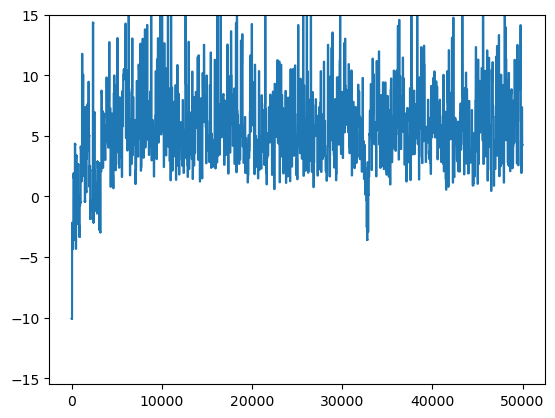

In [6]:
fig, ax = plt.subplots()
xs = np.linspace(0, len(tot_e), len(tot_e))
ax.set_ylim([-15.5, 15.0])
ax.plot(xs, tot_e)

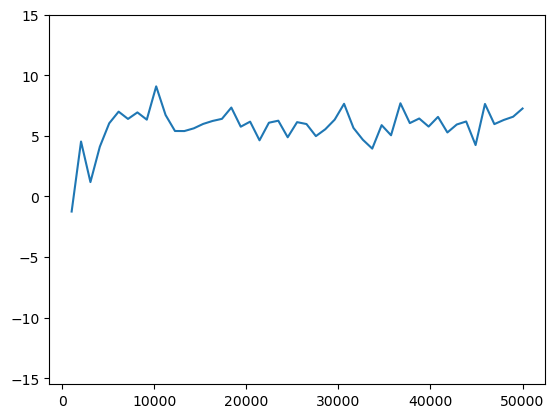

In [11]:
ls = np.linspace(0, len(atom_cols)-1, 50).astype(int)
Es = []
for i in range(50-1):
    atom_cols_div = atom_cols[ls[i]:ls[i+1]]
    kin_e = np.array([atom_col.get_kinetic_energy() for atom_col in atom_cols_div])
    pot_e = np.array([atom_col.get_potential_energy() for atom_col in atom_cols_div])
    tot_e = np.mean(kin_e + pot_e)
    Es.append(tot_e)
fig, ax = plt.subplots()
xs = np.linspace(0, len(Es), len(Es))
ax.set_ylim([-15.5, 15.0])
ax.plot(ls[1::], Es)
    